# Siggi Example

### Import necessary code from repo

In [1]:
import sys
sys.path.append('..')

In [2]:
from siggi import siggi, filters, spectra, calcIG, plotting
from siggi import Sed
from siggi.lsst_utils import BandpassDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/Bryce/miniconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Set up filter object and get example spectra

In [3]:
f = filters()
s = spectra()
red_spec = s.get_red_spectrum()
blue_spec = s.get_blue_spectrum()

### Define redshift prior

In [4]:
def prior_z(z, z0=0.5):
    return (z**2.)*np.exp(-(z/z0)**1.5)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**1.5)))

In [5]:
# Shows the total entropy for 2 SEDs with equal weighting
entropy = -1. * .5 * np.sum(prior_z(np.arange(0.05, 2.51, .05)) * np.log2(.5 * prior_z(np.arange(0.05, 2.51, .05))))
print(entropy*2.)

5.807147751224095


### Set up a siggi object with the SEDs, the SED weights, the prior, and the redshift binning defined.

In [6]:
sig_example = siggi([red_spec, blue_spec], [0.5, 0.5], prior_z,
                    z_min=0.05, z_max=2.5, z_steps=50)

### Can also include a set of filters that are static and not moved in the optimization

Here we use the LSST *ugrizy* filters

In [7]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../data/lsst_baseline_throughputs/')
# To make things more interesting we will just use the 'u' and 'g' filters.
frozen_dict = BandpassDict(frozen_dict.values()[:2], frozen_dict.keys()[:2])

### Run optimization

In [8]:
%%time
random_state = np.random.RandomState(17)
num_filters = 2
set_ratio = 1.0
res = sig_example.optimize_filters(num_filters=num_filters,
                                   filt_min=300., filt_max=1100.,
                                   sed_mags=22.0,
                                   set_ratio=set_ratio,
                                   system_wavelen_max=1200.,
                                   n_opt_points=15,
                                   optimizer_verbosity=10,
                                   procs=2, acq_func_kwargs_dict={'kappa':3},
                                   frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                                   starting_points = None,
                                   rand_state = random_state)

[(300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0), (300.0, 1100.0)] [[300.0, 566.6666666666667, 833.3333333333334, 1100.0], [300.0, 433.33333333333337, 566.6666666666667, 700.0], [700.0, 833.3333333333334, 966.6666666666667, 1100.0], [354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353], [760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306], [331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261], [340.95493249636297, 821.9348923725239, 991.2336828369688, 1001.8324209184242], [526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407], [538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197], [344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016]]
[300.0, 566.6666666666667, 833.3333333333334, 1100.0] 2.2033668318464197


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.4s


[300.0, 433.33333333333337, 566.6666666666667, 700.0] 1.7210104844905212
[700.0, 833.3333333333334, 966.6666666666667, 1100.0] 3.046136511302787
[354.3202865530331, 453.2166295579959, 535.7320021496878, 724.4694044842353] 1.7163287982119089


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   47.7s


[760.4823150024272, 810.0167168349087, 825.0668174206844, 929.5883679999306] 2.947333628743292
[331.2503329510932, 348.0357442523083, 586.2508835868391, 1056.5465494547261] 2.017513943231301
[340.95493249636297, 821.9348923725239, 991.2336828369688, 1001.8324209184242] 2.2681607846985052
[526.3905286855929, 686.8228994480016, 741.4010949079002, 778.0106025912407] 2.82883152645964
[538.1805746414173, 616.8379488376213, 749.2071242610889, 930.9605677431197] 3.0019292975084477
[344.193080172659, 415.1231366202623, 420.72535553654166, 634.7875082767016] 1.1747450064126568


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.8min finished


-3.046136511302787 10
[559.2529285898182, 919.5358918851564] [[558.5949889007854, 558.5949889007854, 559.910868278851, 559.910868278851], [765.2768787811308, 765.2768787811308, 1073.794904989182, 1073.794904989182]]
[618.8967752142162, 899.4906190869985] [[584.6487729909522, 584.6487729909522, 653.1447774374801, 653.1447774374801], [782.5462281854165, 782.5462281854166, 1016.4350099885805, 1016.4350099885805]]
[558.5949889007854, 559.910868278851, 765.2768787811308, 1073.794904989182] 0.7428394081786118
[584.6487729909522, 653.1447774374801, 782.5462281854165, 1016.4350099885805] 3.1422887225888254


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   21.8s finished


-3.1422887225888254 12
[597.8952819186134, 858.6862968214386] [[555.7072992204278, 555.7072992204278, 640.0832646167989, 640.0832646167989], [764.5735811700936, 764.5735811700936, 952.7990124727837, 952.7990124727838]]
[597.8846678646128, 781.1993647552565] [[555.6917662696889, 555.691766269689, 640.0775694595366, 640.0775694595366], [764.5653909885427, 764.5653909885427, 797.8333385219703, 797.8333385219703]]
[555.7072992204278, 640.0832646167989, 764.5735811700936, 952.7990124727838] 3.0489097858799705
[555.6917662696889, 640.0775694595366, 764.5653909885427, 797.8333385219703] 2.6185631852100237


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   22.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   22.0s finished


-3.1422887225888254 14
[617.2625884532315, 917.6102467313387] [[582.0129012775593, 582.0129012775592, 652.5122756289038, 652.5122756289038], [780.6816993141874, 780.6816993141874, 1054.53879414849, 1054.53879414849]]
[617.2625932635333, 917.6102438427055] [[582.0129085504356, 582.0129085504354, 652.5122779766311, 652.5122779766311], [780.6817092569188, 780.6817092569188, 1054.5387784284922, 1054.5387784284922]]
[582.0129012775593, 652.5122756289038, 780.6816993141874, 1054.53879414849] 3.160553247705851
[582.0129085504356, 652.5122779766311, 780.6817092569188, 1054.5387784284922] 3.160553247705851


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.0s finished


-3.160553247705851 16
CPU times: user 28.7 s, sys: 2.42 s, total: 31.1 s
Wall time: 3min 20s


### Find the best results

In [9]:
min_idx = np.argmin(res.yi)

In [10]:
best_pt = res.Xi[min_idx]

In [11]:
best_val = np.min(res.yi)

In [12]:
print(best_pt, best_val)

[582.0129012775593, 652.5122756289038, 780.6816993141874, 1054.53879414849] -3.160553247705851


### Plot with Siggi's plotting code

In [13]:
red_spec.redshiftSED(0.5)
blue_spec.redshiftSED(0.5)
sig_plot = plotting([red_spec, blue_spec], best_pt, set_ratio=1.0,
                    frozen_filt_dict=frozen_dict, frozen_filt_eff_wavelen=[365, 477],
                    sed_mags=22.0)

#### Let's first make a plot of the new filters along with the filters we've frozen in place. For reference we'll also include the SEDs at redshift z=0.5.

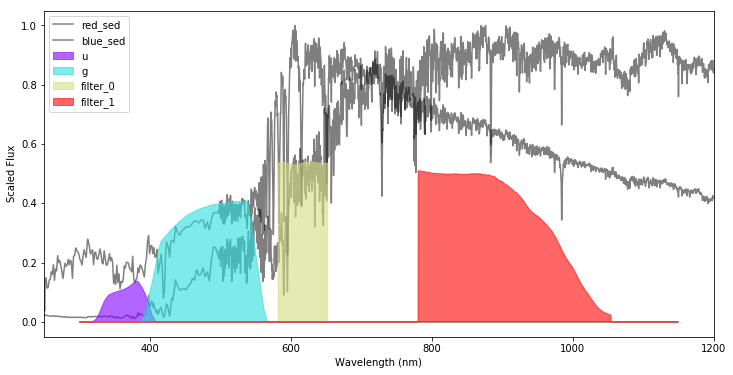

In [14]:
fig = sig_plot.plot_filters()
plt.legend(['red_sed', 'blue_sed'] + sig_plot.filter_dict.keys())

#### We can also look at a color-color plot of the new color values for each sed as it increases in redshift and the error bars on the colors

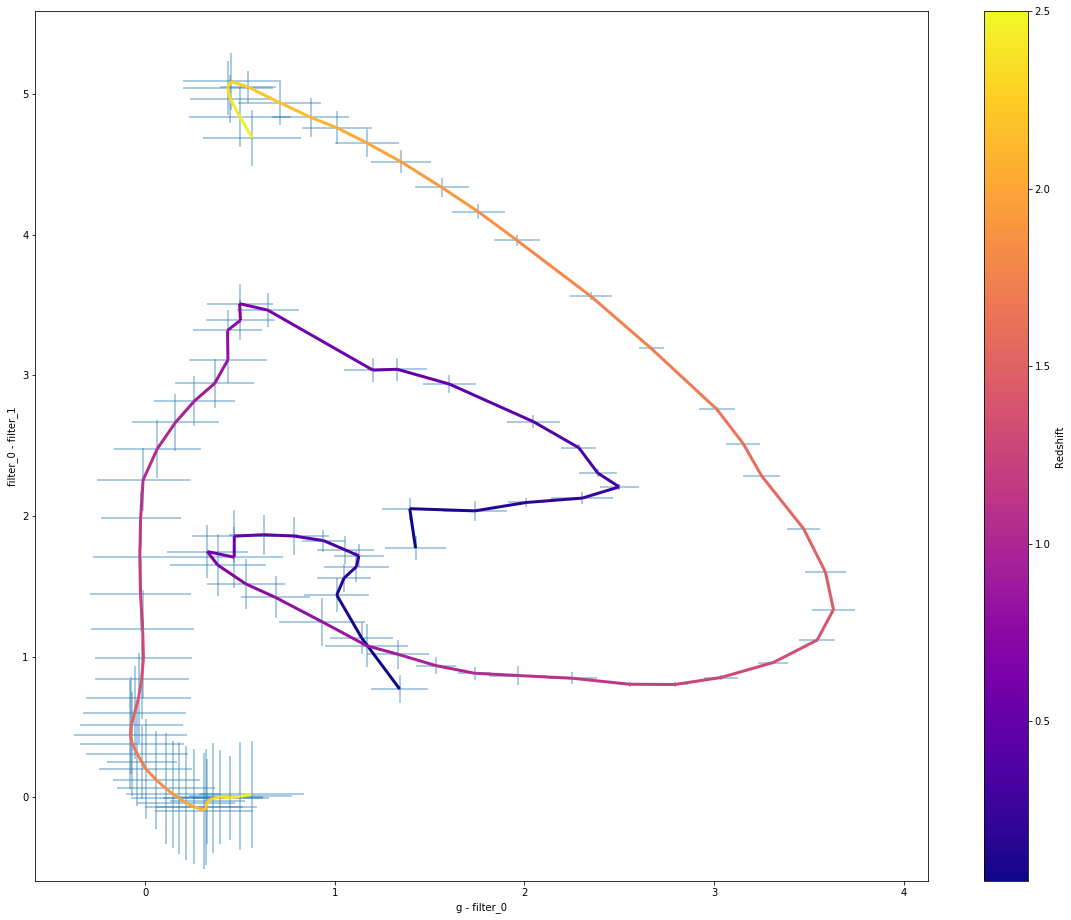

In [15]:
fig = plt.figure(figsize=(20,16))
fig = sig_plot.plot_color_color(['g', 'filter_0', 'filter_0', 'filter_1'],
                                np.linspace(0.05, 2.5, 50), fig=fig)